In [9]:
# import sys
# sys.path.append('/Users/billystrickland/Documents/code/resonators')
from utils.shabanipy.labber import LabberData
from utils.jy_mpl_settings.settings import jy_mpl_rc
from utils.jy_mpl_settings.colors import line_colors

import csv
import matplotlib.pyplot as plt
import numpy as np
import utils.resonator_functions as rf
import utils.fluxonium_functions as ff
from scipy.optimize import curve_fit
plt.style.use(jy_mpl_rc)
root = '/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/data'

In [14]:
sample='4gmon@v10-05-WMSLJB-CD1'
channels = ['SC3 - Drive - Frequency', 'Repeat', 'VNA - S21']

file_num = '073'
day = '16'
month = '01'
year= '2024'

drive, repeats, signal = ff.extract_data(f'{root}/{sample}-{file_num}.hdf5', channels = channels, get_x = False)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 2, 31).

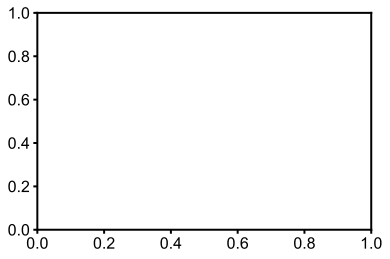

In [15]:
fig, ax = plt.subplots(figsize = (6, 4))
signal_avg = rf.average_data(abs(signal[:,:,0]))
img = plt.imshow(signal_avg*1e2, interpolation = 'nearest', aspect = 'auto', cmap = 'viridis',
          extent = [drive[0]*1e-9, drive[-1]*1e-9, repeats[0]*2.7/60,  repeats[-1]*2.7/60])
plt.xlabel('$f_\mathrm{drive}$ (GHz)')
plt.ylabel('time (min)')
cbar = fig.colorbar(img, ax=ax)
cbar.ax.set_ylabel('$|S_{21}|$ (arb. units)')
fig.tight_layout()
plt.savefig(f'/Users/billystrickland/Documents/code/resonators/devices/gatemons/figs/timeseries-2d-{file_num}.pdf', format='pdf')

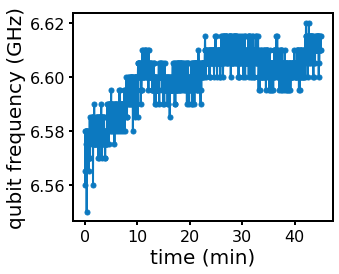

In [4]:
fq = []
for i in signal_avg:
    fq.append(drive[np.argmin(i)])
    
fq = np.array(fq)
fig, ax = plt.subplots(figsize = (5, 4))

plt.plot(repeats*2.7/60, fq[::-1]*1e-9, marker= '.')
plt.xlabel('time (min)')
plt.ylabel('qubit frequency (GHz)')

fig.tight_layout()
plt.savefig(f'/Users/billystrickland/Documents/code/resonators/devices/gatemons/figs/timeseries-1d-{file_num}.pdf', format='pdf')